In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [119]:
df = pd.read_csv('indicator_f 15-24 employ.csv')
df_male = pd.read_excel('indicator_m 15-24 employ.xlsx')
df.drop('difference', axis=1,inplace=True)
df_male['gender']='male'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 18 columns):
Female 15-24 employment to population (%)    178 non-null object
1991                                         178 non-null float64
1992                                         178 non-null float64
1993                                         178 non-null float64
1994                                         178 non-null float64
1995                                         178 non-null float64
1996                                         178 non-null float64
1997                                         178 non-null float64
1998                                         178 non-null float64
1999                                         178 non-null float64
2000                                         178 non-null float64
2001                                         178 non-null float64
2002                                         178 non-null float64
2003                                  

In [120]:
df_male.info()
#df.drop(178, axis = 0, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 19 columns):
Male 15-24 employment to population (%)    356 non-null object
1991                                       356 non-null float64
1992                                       356 non-null float64
1993                                       356 non-null float64
1994                                       356 non-null float64
1995                                       356 non-null float64
1996                                       356 non-null float64
1997                                       356 non-null float64
1998                                       356 non-null float64
1999                                       356 non-null float64
2000                                       356 non-null float64
2001                                       356 non-null float64
2002                                       356 non-null float64
2003                                       356 non-null float64


In [108]:
position = [1,2]

In [109]:
height =[df.mean(axis=1).max(),df.mean(axis=1).min()]

In [111]:
labels = [df.loc[df.mean(axis=1).idxmax()]['Female 15-24 employment to population (%)'], df.loc[df.mean(axis=1).idxmin()]['Female 15-24 employment to population (%)']]

<Container object of 2 artists>

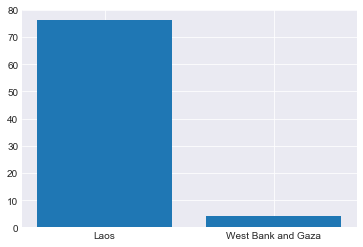

In [113]:
plt.bar(position,height,tick_label = labels)

In [34]:
difference_between_year=df-df.shift(1,axis=1) #get difference between years
difference_between_year.fillna(0)
df['diff_sum']=difference_between_year.sum(axis=1) #get trend of the employment

In [35]:
low_mean = df.query('diff_sum < 0')['diff_sum'].mean()
high_mean = df.query('diff_sum >= 0')['diff_sum'].mean()
low = df.query('diff_sum == {}'.format(df['diff_sum'].min()))
high = df.query('diff_sum == {}'.format(df['diff_sum'].max()))
print(low_mean)
print(high_mean)

-6.758715559091745
5.042857173528572


In [9]:
decrease_country = df.query('diff_sum < {}'.format(low_mean))
increase_country = df.query('diff_sum >= {}'.format(high_mean))
print(decrease_country)
print(increase_country)
#df['attribute']='15-24'

NameError: name 'low_mean' is not defined

['Thailand']


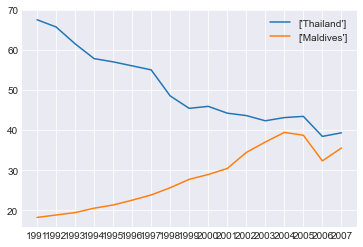

In [99]:
x=['1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007']
#y.info()
plt.plot(x,low.transpose().loc['1991':'2007',:],label=low['Female 15-24 employment to population (%)'].values)
plt.plot(x,high.transpose().loc['1991':'2007',:],label=high['Female 15-24 employment to population (%)'].values)
plt.legend()
print(low['Female 15-24 employment to population (%)'].values)

,Female 15-24 employment to population (%),1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,diff_sum
0,Afghanistan,29.600000,29.400000,29.400000,29.000000,29.000000,28.900000,28.900000,28.900000,28.900000,29.100000,29.500000,29.600000,27.900000,29.600000,26.600000,28.700001,28.500000,-1.100000
1,Albania,34.000000,33.400002,33.500000,33.700001,33.799999,33.400002,33.599998,33.400002,33.099998,32.799999,32.500000,32.299999,31.900000,31.500000,31.000000,30.700001,31.000000,-3.000000
2,Algeria,14.000000,13.500000,13.700000,13.600000,12.700000,13.100000,13.600000,13.600000,13.500000,13.100000,14.200000,15.000000,16.100000,18.900000,20.299999,21.900000,22.700001,8.700001
3,Angola,64.000000,64.300003,63.700001,64.199997,63.599998,63.599998,63.299999,63.299999,63.200001,63.000000,62.799999,62.900002,62.700001,62.700001,62.700001,62.700001,62.599998,-1.400002
4,Argentina,31.799999,32.299999,32.400002,33.000000,32.799999,33.500000,33.700001,33.200001,32.400002,32.599998,32.000000,30.900000,32.599998,32.200001,31.900000,31.500000,31.400000,-0.400000
5,Armenia,17.400000,17.700001,15.800000,15.100000,15.400000,17.100000,16.799999,17.799999,17.299999,17.900000,18.600000,19.100000,19.100000,18.400000,18.600000,18.100000,19.400000,2.000000
6,Australia,55.700001,54.500000,54.099998,57.000000,59.500000,59.299999,57.700001,58.700001,59.799999,61.099998,60.599998,60.299999,61.099998,61.500000,62.500000,63.000000,63.299999,7.599998
7,Austria,58.500000,59.200001,55.599998,56.099998,53.000000,51.400002,50.400002,49.900002,48.500000,47.500000,46.400002,46.700001,46.000000,47.799999,49.299999,50.000000,47.400002,-11.099998
8,Azerbaijan,33.700001,34.500000,34.299999,33.099998,31.900000,32.299999,33.000000,33.200001,33.200001,33.500000,33.500000,33.299999,33.700001,34.900002,33.099998,31.700001,35.500000,1.799999
9,Bahamas,39.599998,36.200001,38.299999,38.200001,40.000000,37.000000,37.599998,41.099998,40.700001,42.000000,42.799999,40.299999,37.299999,38.200001,39.799999,42.099998,40.500000,0.900002


,Female 15-24 employment to population (%),1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,0,0.0,-0.200001,0.000000,-0.400000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.200001,0.400000,0.100000,-1.700001,1.700001,-3.000000,2.100000,-0.200001
1,0,0.0,-0.599998,0.099998,0.200001,0.099998,-0.399998,0.199997,-0.199997,-0.300003,-0.299999,-0.299999,-0.200001,-0.400000,-0.400000,-0.500000,-0.299999,0.299999
2,0,0.0,-0.500000,0.200000,-0.099999,-0.900001,0.400001,0.500000,0.000000,-0.100000,-0.400000,1.099999,0.800000,1.100000,2.799999,1.400000,1.600000,0.800001
3,0,0.0,0.300003,-0.600002,0.499996,-0.599998,0.000000,-0.299999,0.000000,-0.099998,-0.200001,-0.200001,0.100002,-0.200001,0.000000,0.000000,0.000000,-0.100002
4,0,0.0,0.500000,0.100002,0.599998,-0.200001,0.700001,0.200001,-0.500000,-0.799999,0.199997,-0.599998,-1.100000,1.699999,-0.399998,-0.300001,-0.400000,-0.100000
5,0,0.0,0.300001,-1.900001,-0.700000,0.299999,1.700001,-0.300001,1.000000,-0.500000,0.600000,0.700001,0.500000,0.000000,-0.700001,0.200001,-0.500000,1.299999
6,0,0.0,-1.200001,-0.400002,2.900002,2.500000,-0.200001,-1.599998,1.000000,1.099998,1.299999,-0.500000,-0.299999,0.799999,0.400002,1.000000,0.500000,0.299999
7,0,0.0,0.700001,-3.600002,0.500000,-3.099998,-1.599998,-1.000000,-0.500000,-1.400002,-1.000000,-1.099998,0.299999,-0.700001,1.799999,1.500000,0.700001,-2.599998
8,0,0.0,0.799999,-0.200001,-1.200001,-1.199999,0.400000,0.700001,0.200001,0.000000,0.299999,0.000000,-0.200001,0.400002,1.200001,-1.800003,-1.399998,3.799999
9,0,0.0,-3.399998,2.099998,-0.099998,1.799999,-3.000000,0.599998,3.500000,-0.399998,1.299999,0.799999,-2.500000,-3.000000,0.900002,1.599998,2.299999,-1.599998


0      -1.100000
1      -3.000000
2       8.700001
3      -1.400002
4      -0.400000
5       2.000000
6       7.599998
7     -11.099998
8       1.799999
9       0.900002
10      2.100000
11    -11.000000
12     -0.799999
13     -7.800001
14     -5.600000
15     11.900002
16     -2.599998
17      7.900000
18      4.599998
19    -11.299999
20     -5.500000
21      5.100002
22      5.000000
23     -8.900000
24     -1.700005
25     -2.199997
26      2.199997
27     -3.100000
28      4.099998
29    -12.000000
         ...    
149     2.000000
150    -9.799999
151    -7.499998
152   -13.799999
153    -7.300003
154    -1.400000
155    -9.900002
156    -0.900002
157    -9.400002
158   -28.200001
159    -3.900000
160    -5.799999
161    16.500000
162    -3.400000
163   -16.000000
164    -0.200001
165     0.699997
166    -7.000000
167     9.300001
168    -8.500000
169    -2.000000
170    -2.300001
171     2.400000
172     6.000000
173   -23.799995
174     1.300000
175     4.800000
176     5.3999

In [71]:
df

,Female 15-24 employment to population (%),1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,difference
0,Afghanistan,29.600000,29.400000,29.400000,29.000000,29.000000,28.900000,28.900000,28.900000,28.900000,29.100000,29.500000,29.600000,27.900000,29.600000,26.600000,28.700001,28.500000,-1.100000
1,Albania,34.000000,33.400002,33.500000,33.700001,33.799999,33.400002,33.599998,33.400002,33.099998,32.799999,32.500000,32.299999,31.900000,31.500000,31.000000,30.700001,31.000000,-3.000000
2,Algeria,14.000000,13.500000,13.700000,13.600000,12.700000,13.100000,13.600000,13.600000,13.500000,13.100000,14.200000,15.000000,16.100000,18.900000,20.299999,21.900000,22.700001,8.700001
3,Angola,64.000000,64.300003,63.700001,64.199997,63.599998,63.599998,63.299999,63.299999,63.200001,63.000000,62.799999,62.900002,62.700001,62.700001,62.700001,62.700001,62.599998,-1.400002
4,Argentina,31.799999,32.299999,32.400002,33.000000,32.799999,33.500000,33.700001,33.200001,32.400002,32.599998,32.000000,30.900000,32.599998,32.200001,31.900000,31.500000,31.400000,-0.400000
5,Armenia,17.400000,17.700001,15.800000,15.100000,15.400000,17.100000,16.799999,17.799999,17.299999,17.900000,18.600000,19.100000,19.100000,18.400000,18.600000,18.100000,19.400000,2.000000
6,Australia,55.700001,54.500000,54.099998,57.000000,59.500000,59.299999,57.700001,58.700001,59.799999,61.099998,60.599998,60.299999,61.099998,61.500000,62.500000,63.000000,63.299999,7.599998
7,Austria,58.500000,59.200001,55.599998,56.099998,53.000000,51.400002,50.400002,49.900002,48.500000,47.500000,46.400002,46.700001,46.000000,47.799999,49.299999,50.000000,47.400002,-11.099998
8,Azerbaijan,33.700001,34.500000,34.299999,33.099998,31.900000,32.299999,33.000000,33.200001,33.200001,33.500000,33.500000,33.299999,33.700001,34.900002,33.099998,31.700001,35.500000,1.799999
9,Bahamas,39.599998,36.200001,38.299999,38.200001,40.000000,37.000000,37.599998,41.099998,40.700001,42.000000,42.799999,40.299999,37.299999,38.200001,39.799999,42.099998,40.500000,0.900002


In [49]:
employ_rate_decrease=df.query('difference < 0')
employ_rate_decrease.count()

Female 15-24 employment to population (%)    109
1991                                         109
1992                                         109
1993                                         109
1994                                         109
1995                                         109
1996                                         109
1997                                         109
1998                                         109
1999                                         109
2000                                         109
2001                                         109
2002                                         109
2003                                         109
2004                                         109
2005                                         109
2006                                         109
2007                                         109
difference                                   109
dtype: int64

In [73]:
df.drop('difference', axis=1)

,Female 15-24 employment to population (%),1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,29.600000,29.400000,29.400000,29.000000,29.000000,28.900000,28.900000,28.900000,28.900000,29.100000,29.500000,29.600000,27.900000,29.600000,26.600000,28.700001,28.500000
1,Albania,34.000000,33.400002,33.500000,33.700001,33.799999,33.400002,33.599998,33.400002,33.099998,32.799999,32.500000,32.299999,31.900000,31.500000,31.000000,30.700001,31.000000
2,Algeria,14.000000,13.500000,13.700000,13.600000,12.700000,13.100000,13.600000,13.600000,13.500000,13.100000,14.200000,15.000000,16.100000,18.900000,20.299999,21.900000,22.700001
3,Angola,64.000000,64.300003,63.700001,64.199997,63.599998,63.599998,63.299999,63.299999,63.200001,63.000000,62.799999,62.900002,62.700001,62.700001,62.700001,62.700001,62.599998
4,Argentina,31.799999,32.299999,32.400002,33.000000,32.799999,33.500000,33.700001,33.200001,32.400002,32.599998,32.000000,30.900000,32.599998,32.200001,31.900000,31.500000,31.400000
5,Armenia,17.400000,17.700001,15.800000,15.100000,15.400000,17.100000,16.799999,17.799999,17.299999,17.900000,18.600000,19.100000,19.100000,18.400000,18.600000,18.100000,19.400000
6,Australia,55.700001,54.500000,54.099998,57.000000,59.500000,59.299999,57.700001,58.700001,59.799999,61.099998,60.599998,60.299999,61.099998,61.500000,62.500000,63.000000,63.299999
7,Austria,58.500000,59.200001,55.599998,56.099998,53.000000,51.400002,50.400002,49.900002,48.500000,47.500000,46.400002,46.700001,46.000000,47.799999,49.299999,50.000000,47.400002
8,Azerbaijan,33.700001,34.500000,34.299999,33.099998,31.900000,32.299999,33.000000,33.200001,33.200001,33.500000,33.500000,33.299999,33.700001,34.900002,33.099998,31.700001,35.500000
9,Bahamas,39.599998,36.200001,38.299999,38.200001,40.000000,37.000000,37.599998,41.099998,40.700001,42.000000,42.799999,40.299999,37.299999,38.200001,39.799999,42.099998,40.500000


In [74]:
df.to_csv('indicator_f 15-24 employ.csv',index=False)